## Main Liberaries

In [1]:
!pip install sklearn_features


In [2]:
# import main liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import os
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")


# preproccessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

# models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb


# deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# metrics
from sklearn.metrics import mean_squared_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## The Data

In [3]:
# read the Data
file_path = "/kaggle/input/d/mohammedhamzamoawad/california-houses/housing.csv"

# Read the csv file if is founded

if os.path.exists(file_path):
    
    df = pd.read_csv(file_path)
    print(df.head())
    
else:
    print("The File does not exist.")
    

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
# show the head of the data
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
# show some statestcis
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
# show some statestcis 
df.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [7]:
# show info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Exploratory Data Analysis (EDA)

In [8]:
# check the nulls using pandas 
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

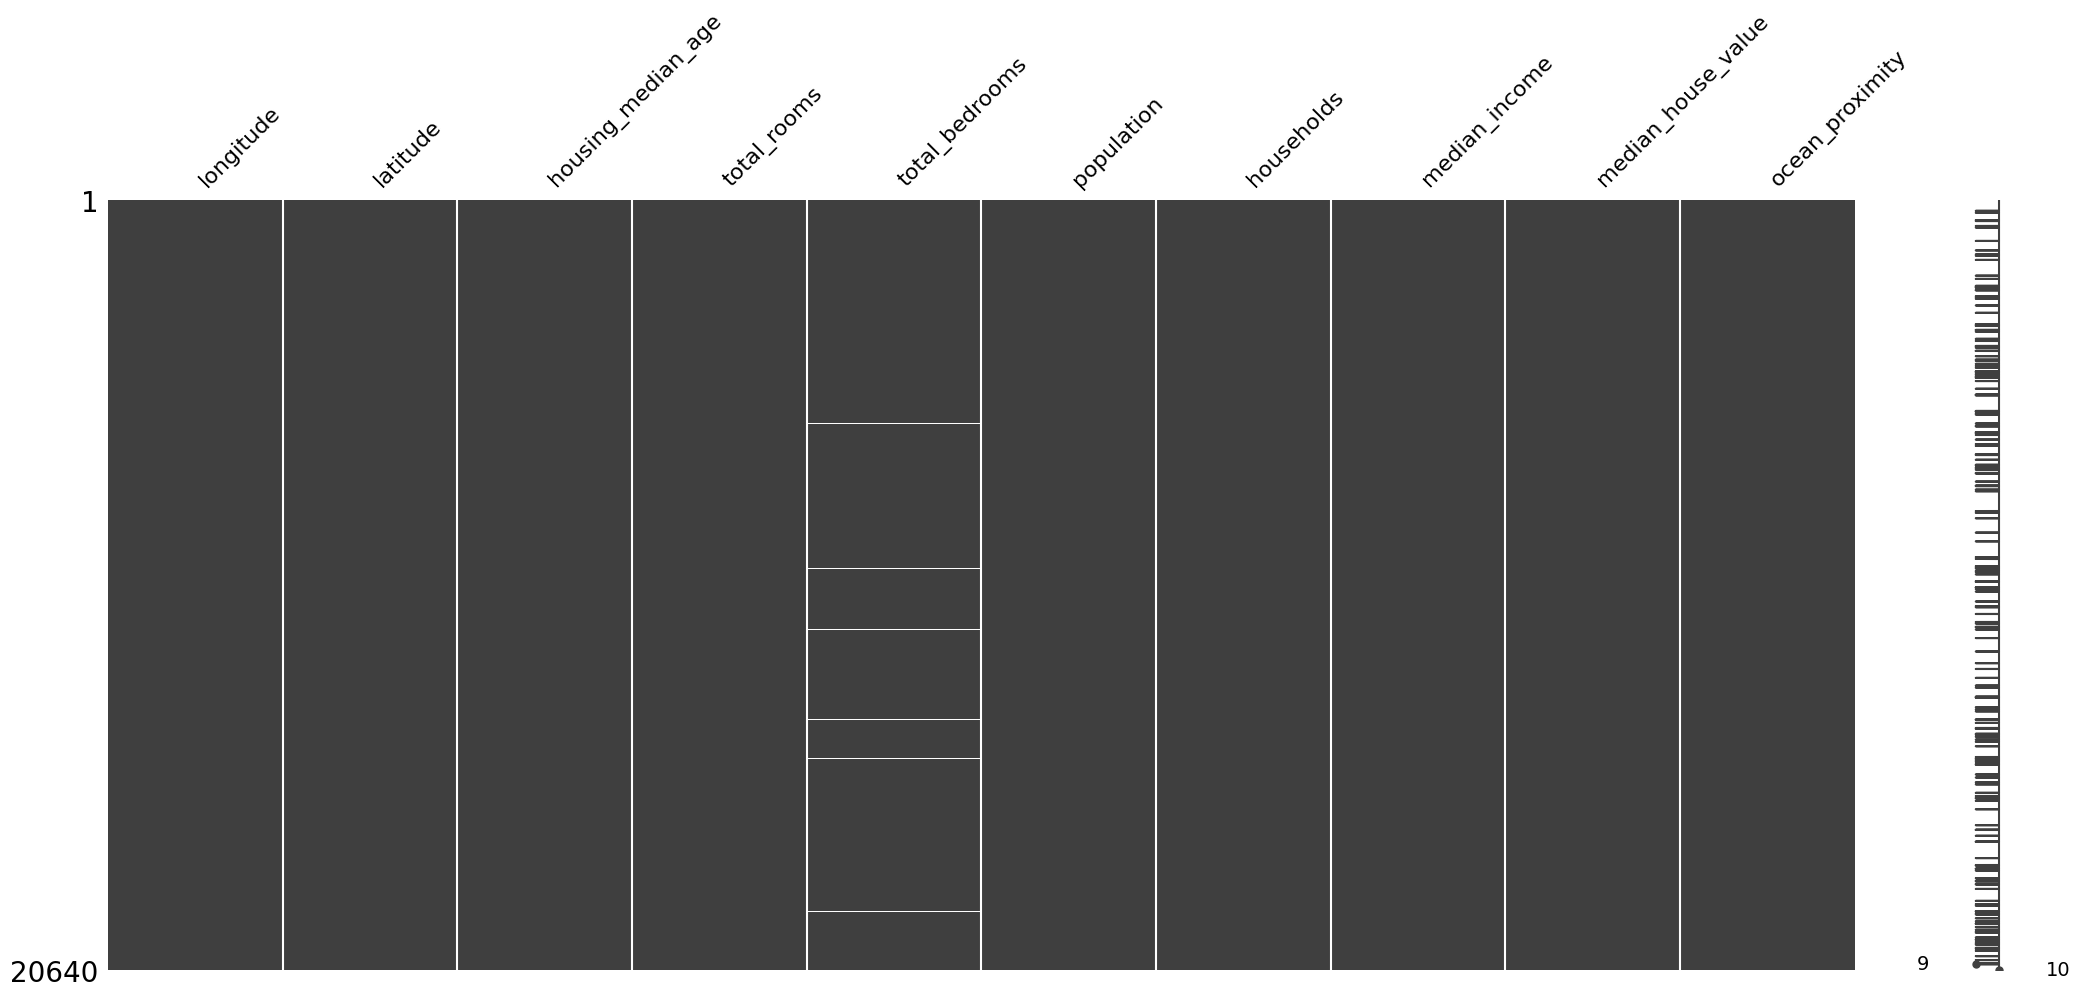

In [9]:
# check the nulls using missingno
msn.matrix(df)

<Axes: >

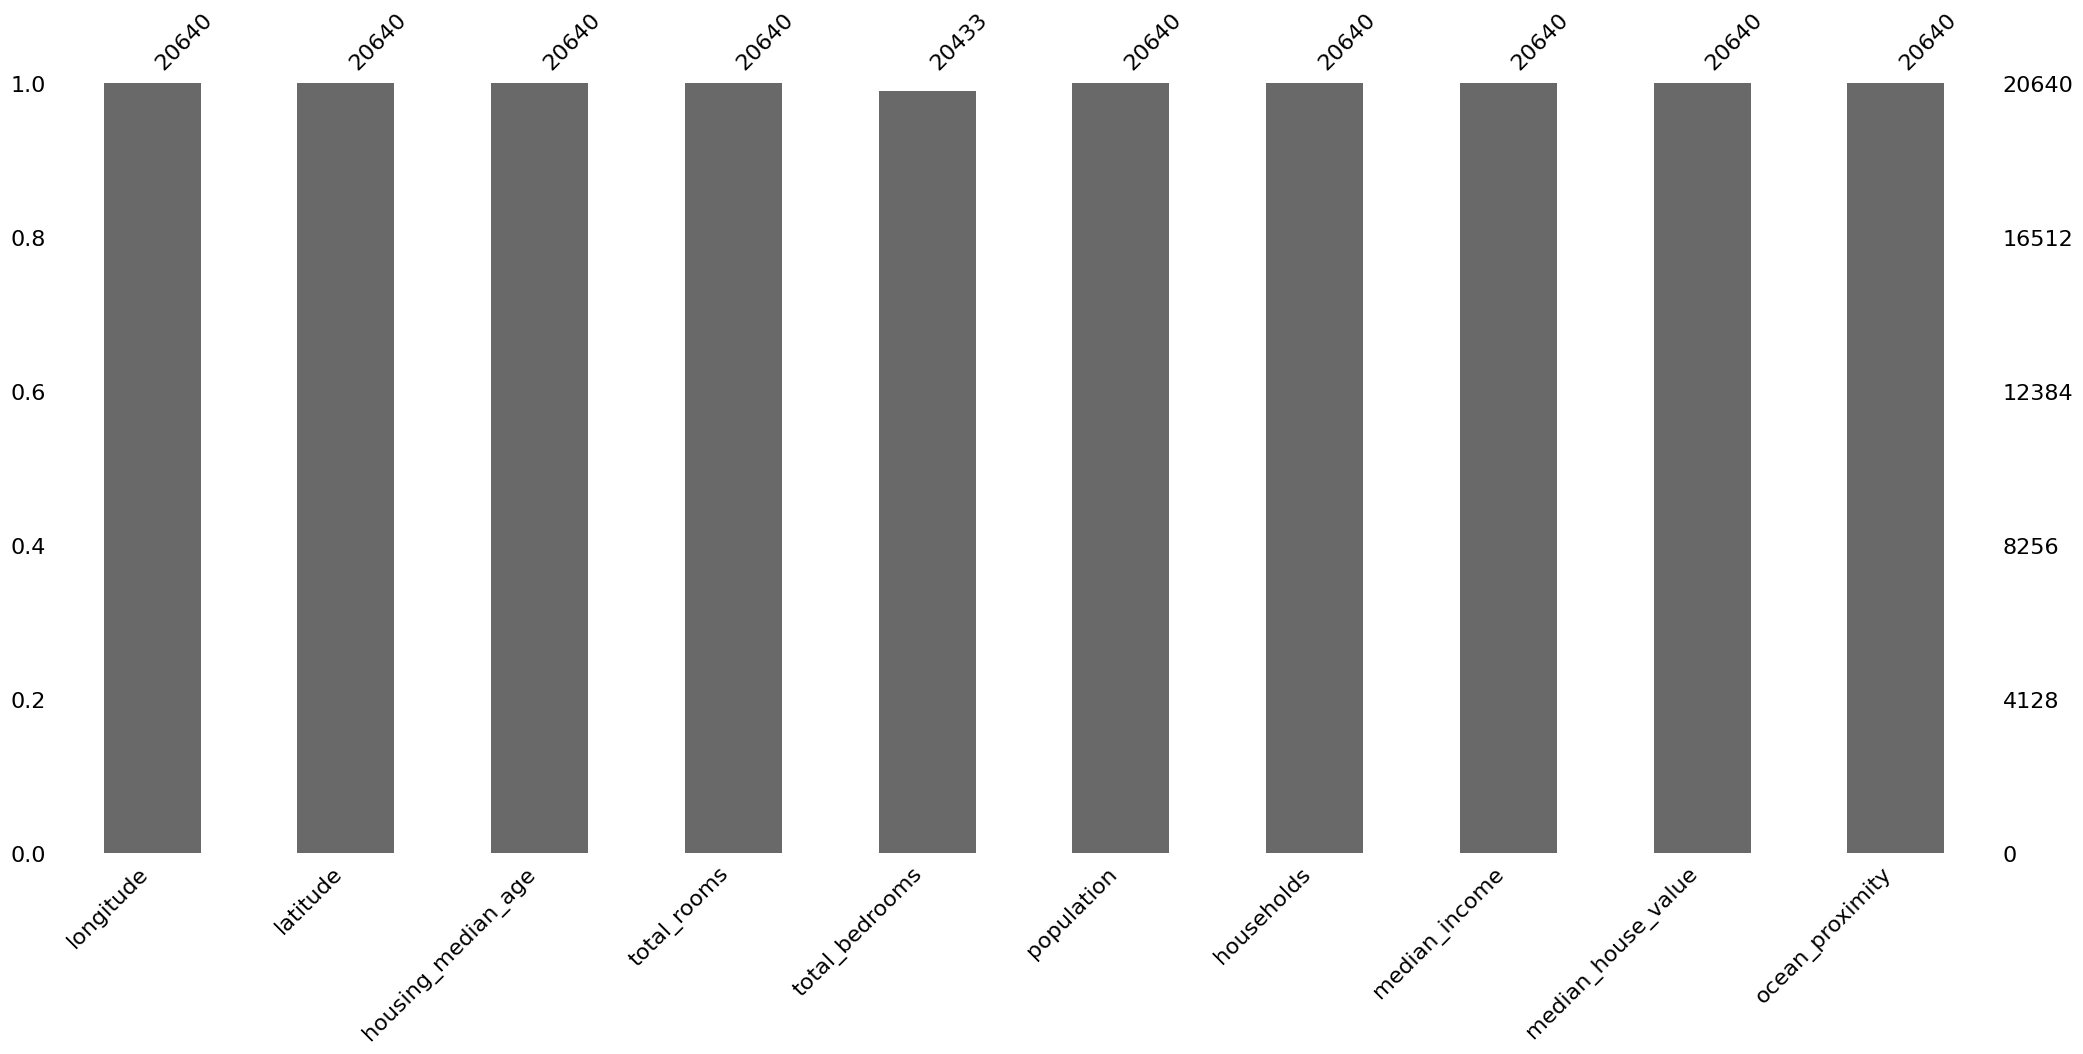

In [10]:
# check the nulls using missingno
msn.bar(df)

### `Plotting median house value on a map using scatter mapbox`

In [11]:
# Plotting median house value on a map using scatter mapbox
fig = go.Figure(go.Scattermapbox(
    lat=df['latitude'],
    lon=df['longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=df['median_house_value'] * 0.000003,  
        color=df['median_house_value'],
        colorscale='Viridis',
        colorbar=dict(title='Median House Value')
    ),
    text=df['median_house_value'],
))

fig.update_layout(
    title='Median House Value Geographical Distribution',
    mapbox=dict(
        style='open-street-map',
        zoom=5, 
    )
)

fig.show()

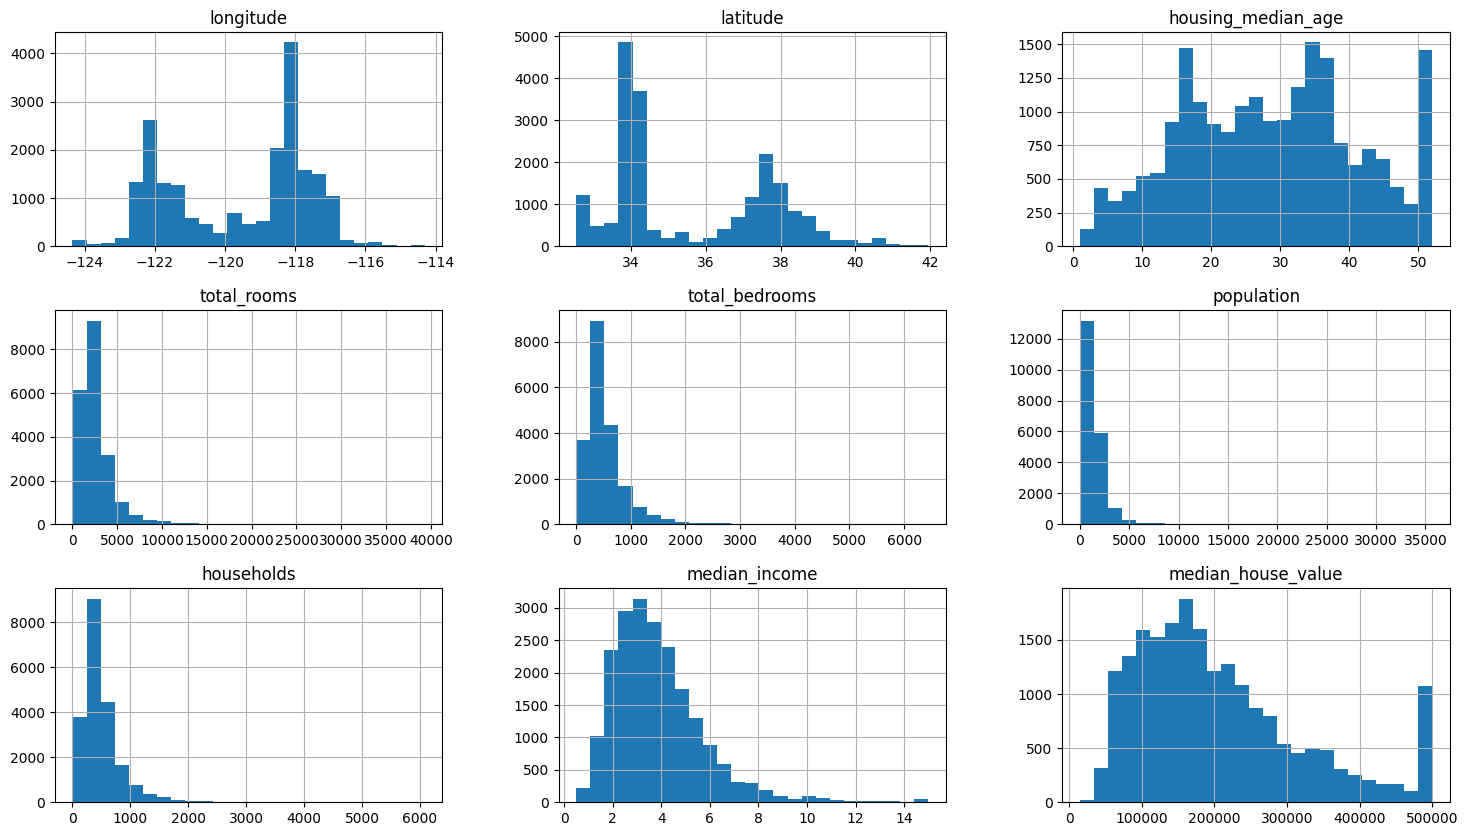

In [12]:
# histograme
df.hist(figsize=(18, 10), bins=25);

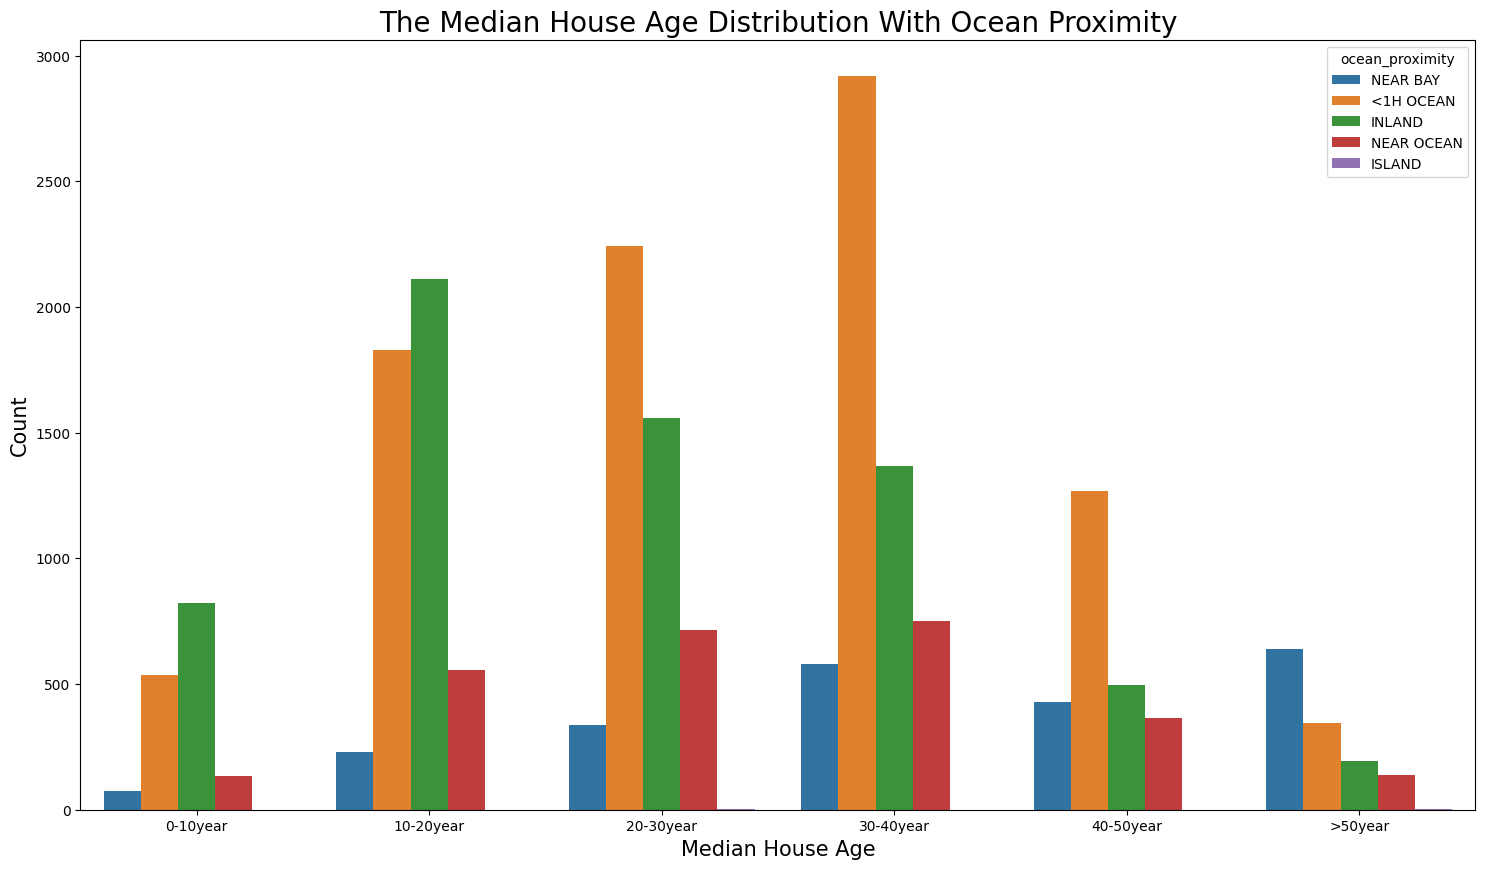

In [13]:
# make bar to show the housing_median_age distribution with ocean_proximity
dist_housing_median_age = pd.cut(x=df["housing_median_age"], 
                                bins=(0, 10, 20, 30, 40, 50, np.inf), 
                                labels=("0-10year", "10-20year", "20-30year", "30-40year", "40-50year", ">50year"))


plt.figure(figsize=(18, 10))
sns.countplot(data=df, x=dist_housing_median_age, hue="ocean_proximity")
plt.title("The Median House Age Distribution With Ocean Proximity", color="black", fontsize=20)
plt.xlabel("Median House Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

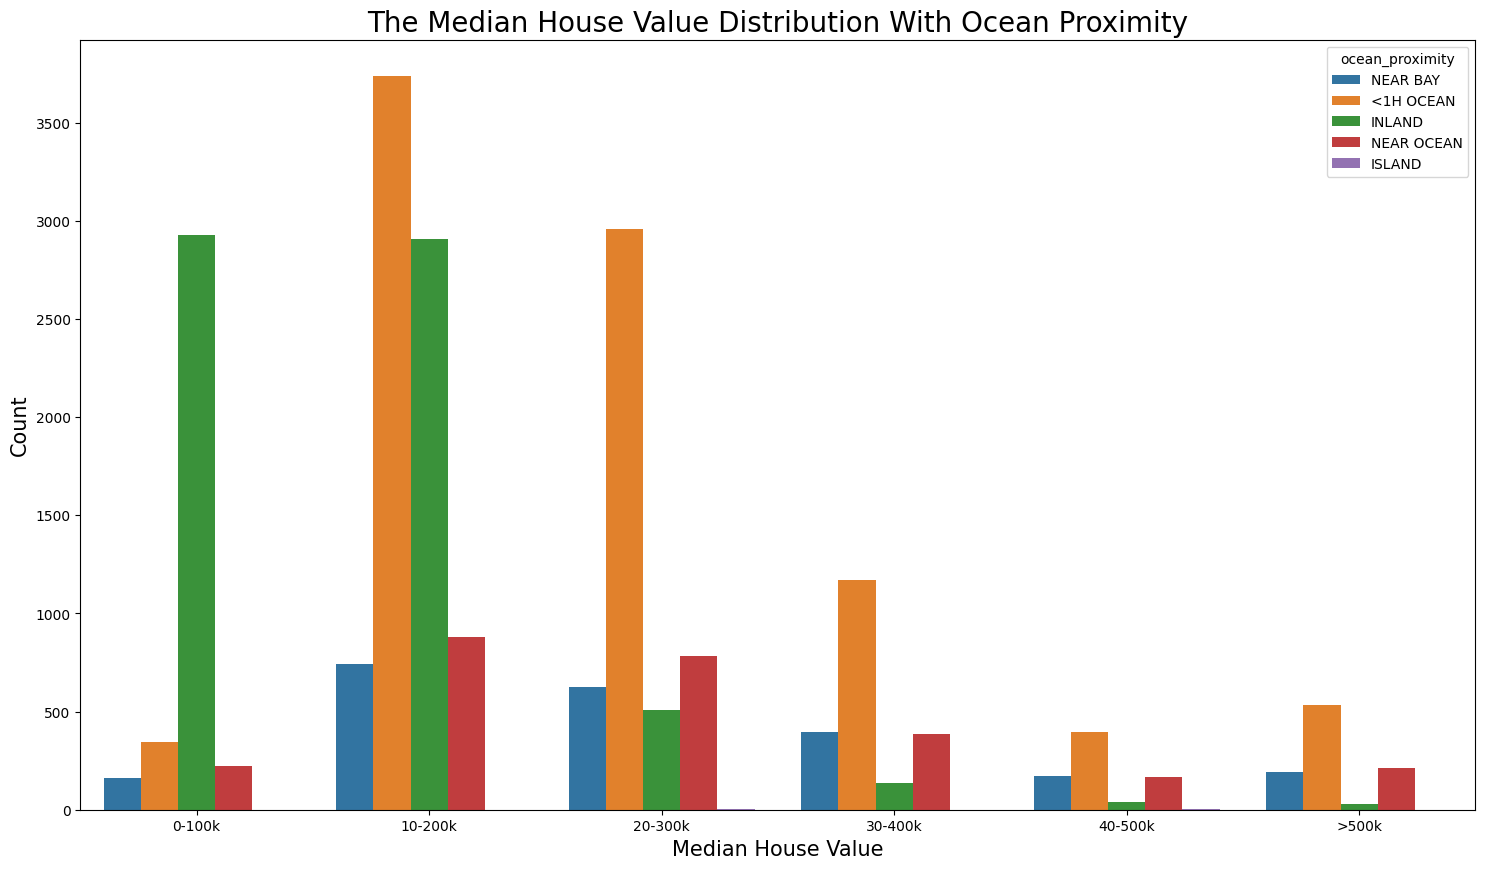

In [14]:
# make bar to show the median_house_value distribution with ocean_proximity
dist_housing_median_age = pd.cut(x=df["median_house_value"], 
                                bins=(0, 100000, 200000, 300000, 400000, 500000, np.inf), 
                                labels=("0-100k", "10-200k", "20-300k", "30-400k", "40-500k", ">500k"))


plt.figure(figsize=(18, 10))
sns.countplot(data=df, x=dist_housing_median_age, hue="ocean_proximity")
plt.title("The Median House Value Distribution With Ocean Proximity", color="black", fontsize=20)
plt.xlabel("Median House Value", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

<Figure size 1800x1000 with 0 Axes>

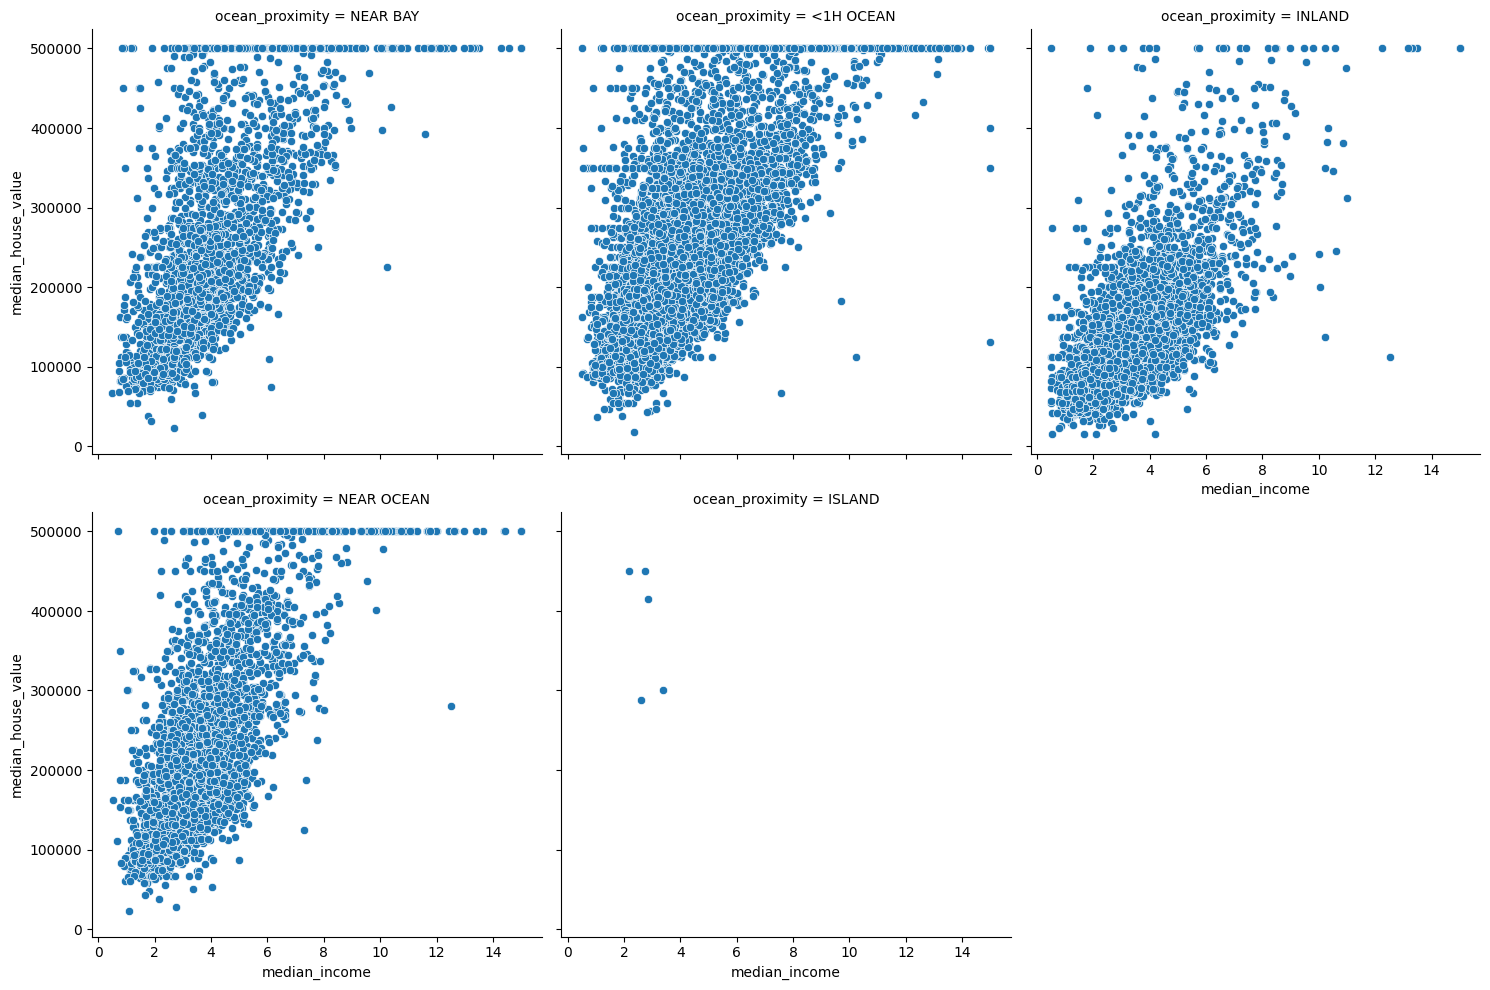

In [15]:
# scatter plot between the (median_income) column and (median_house_value) with (ocean_proximity)
plt.figure(figsize=(18, 10))
sns.relplot(data=df, kind="scatter", x="median_income", y="median_house_value", col="ocean_proximity", col_wrap=3)
plt.show()

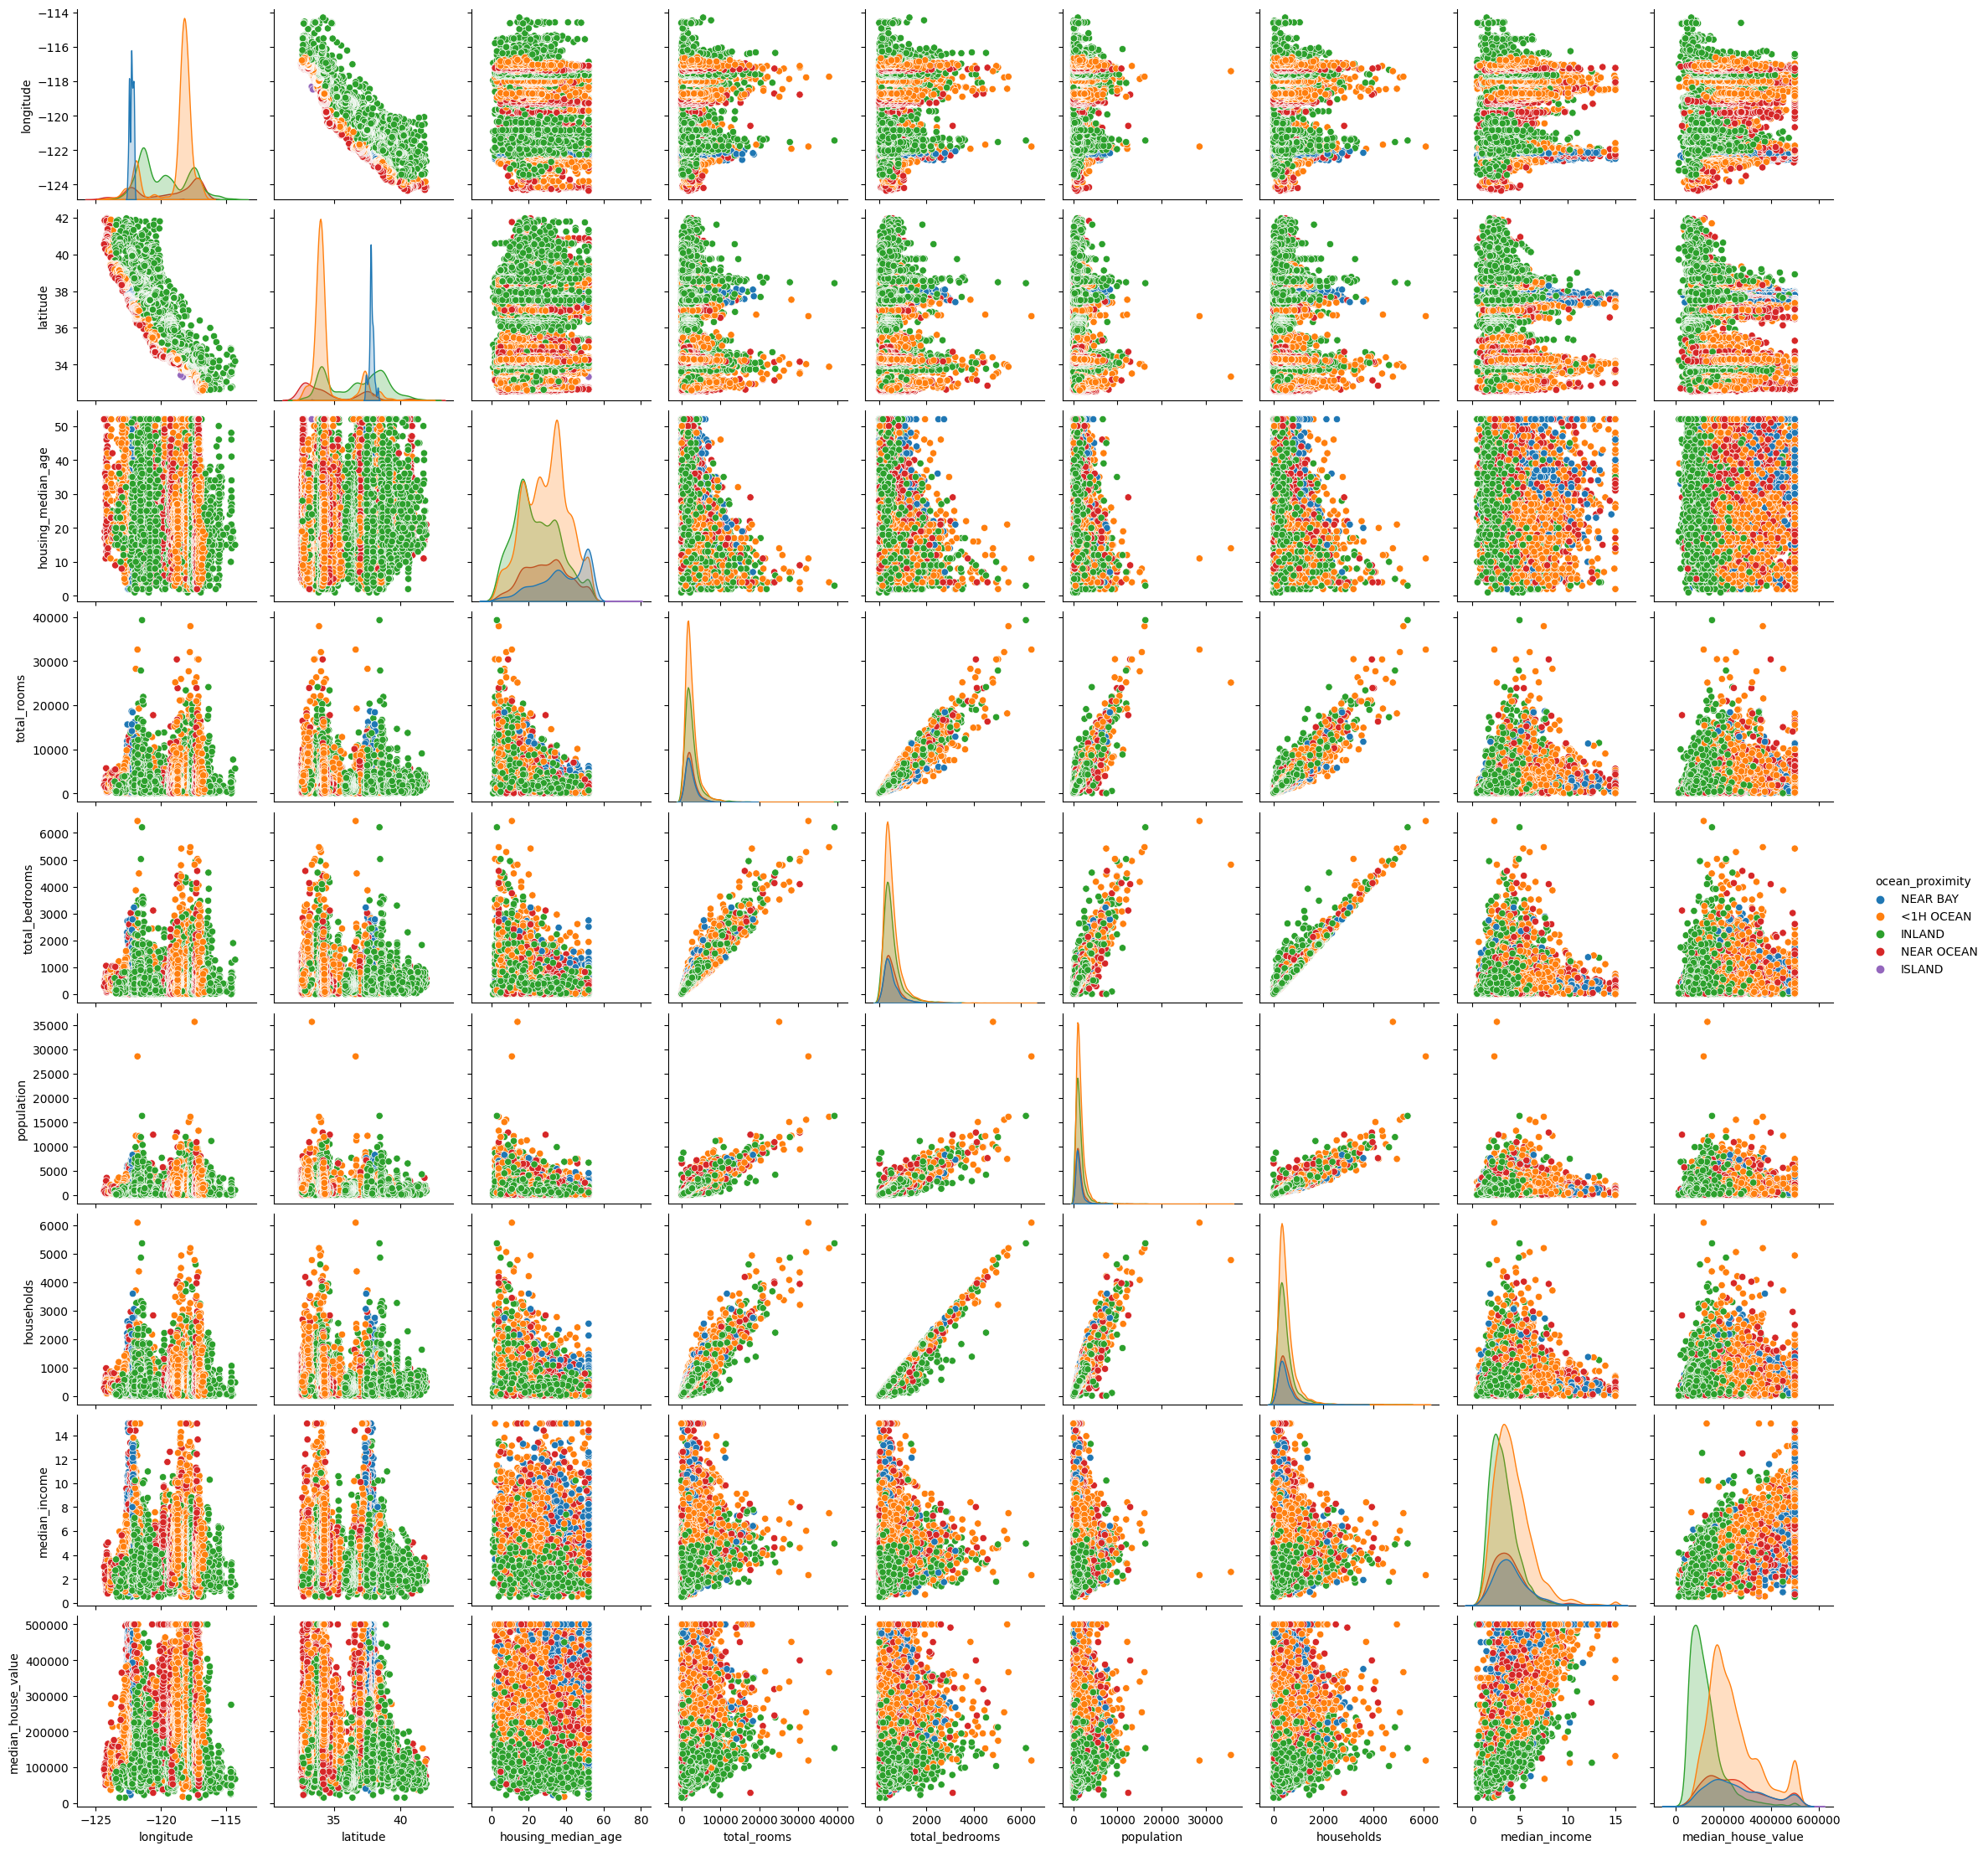

In [16]:
# show the matrix with ocean_proximity column
sns.pairplot(data=df, hue="ocean_proximity")

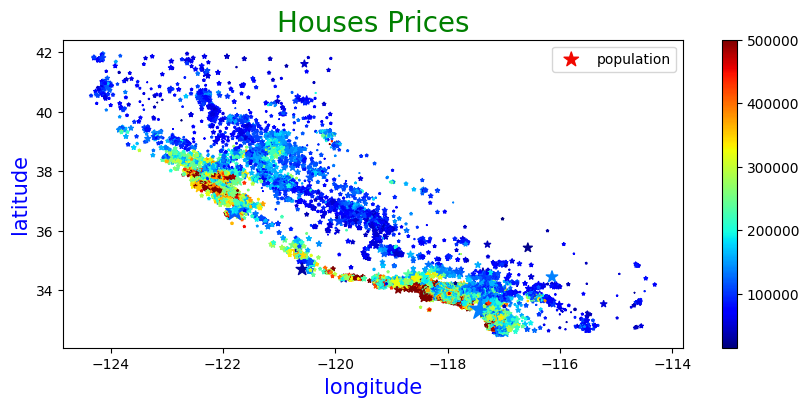

In [17]:
# scatter plot beteween longitude and latitude to show the median_house_value
plt.figure(figsize=(10, 4))
plt.scatter(x=df["longitude"], y=df["latitude"], marker="*", c=df["median_house_value"], s=df["population"]/150, 
           label="population", cmap=plt.get_cmap("jet"), )
plt.legend()
plt.colorbar()
plt.title("Houses Prices", fontsize=20, color="green")
plt.xlabel("longitude", fontsize=15, color="blue")
plt.ylabel("latitude", fontsize=15, color="blue")
plt.show();

In [18]:
# values count
ocean_values = df["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [19]:
ocean_values.shape[0]

5

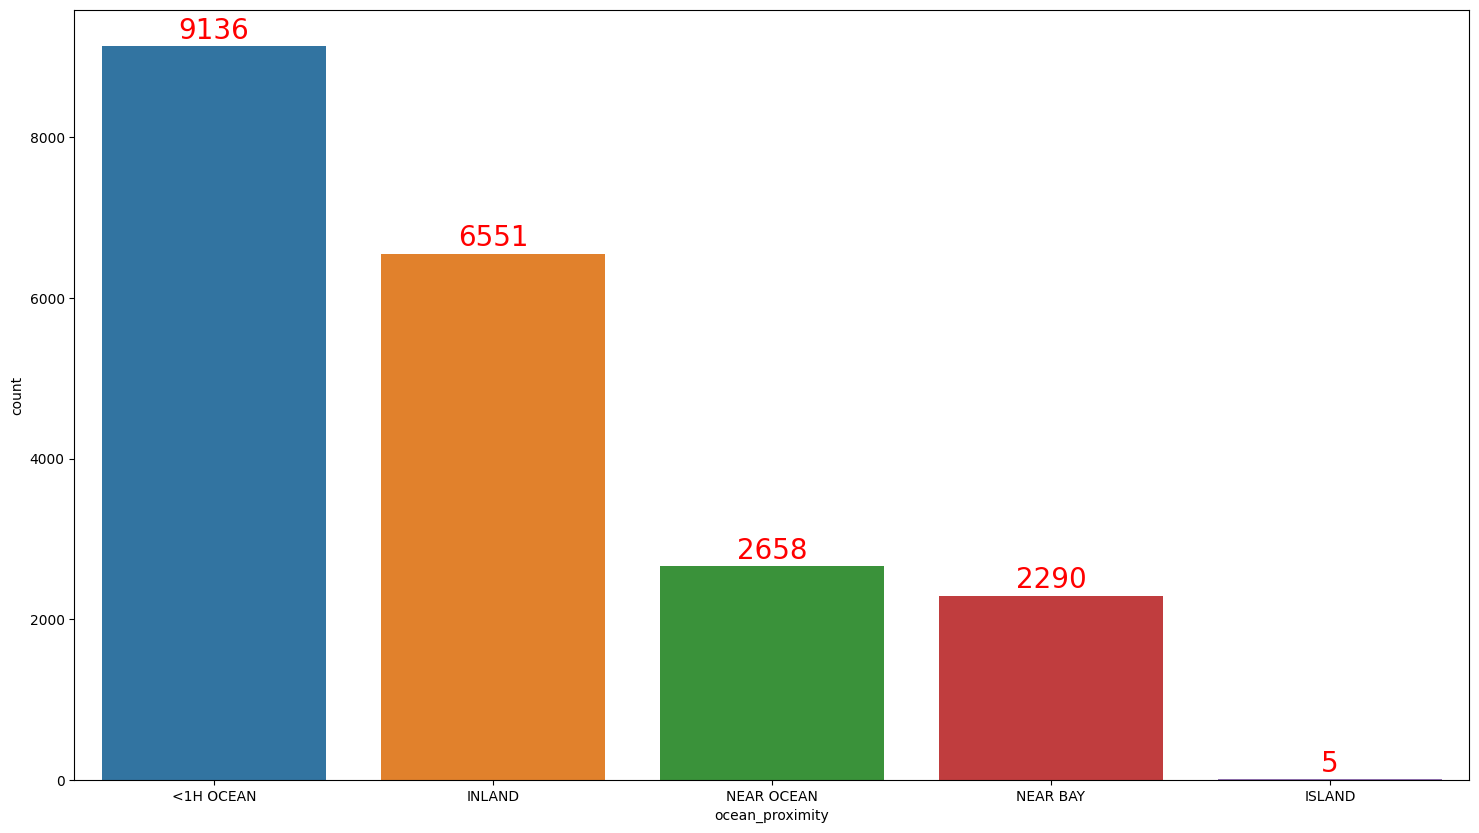

In [20]:
# values count to the ocean_proximity column
plt.figure(figsize=(18, 10))
sns.countplot(data=df ,x="ocean_proximity", order=ocean_values.index)

# show the count
for i in range(ocean_values.shape[0]):
    plt.text(x=i, y=ocean_values.values[i]+100, s=ocean_values.values[i], fontsize=20, color="red", ha="center")
plt.show()


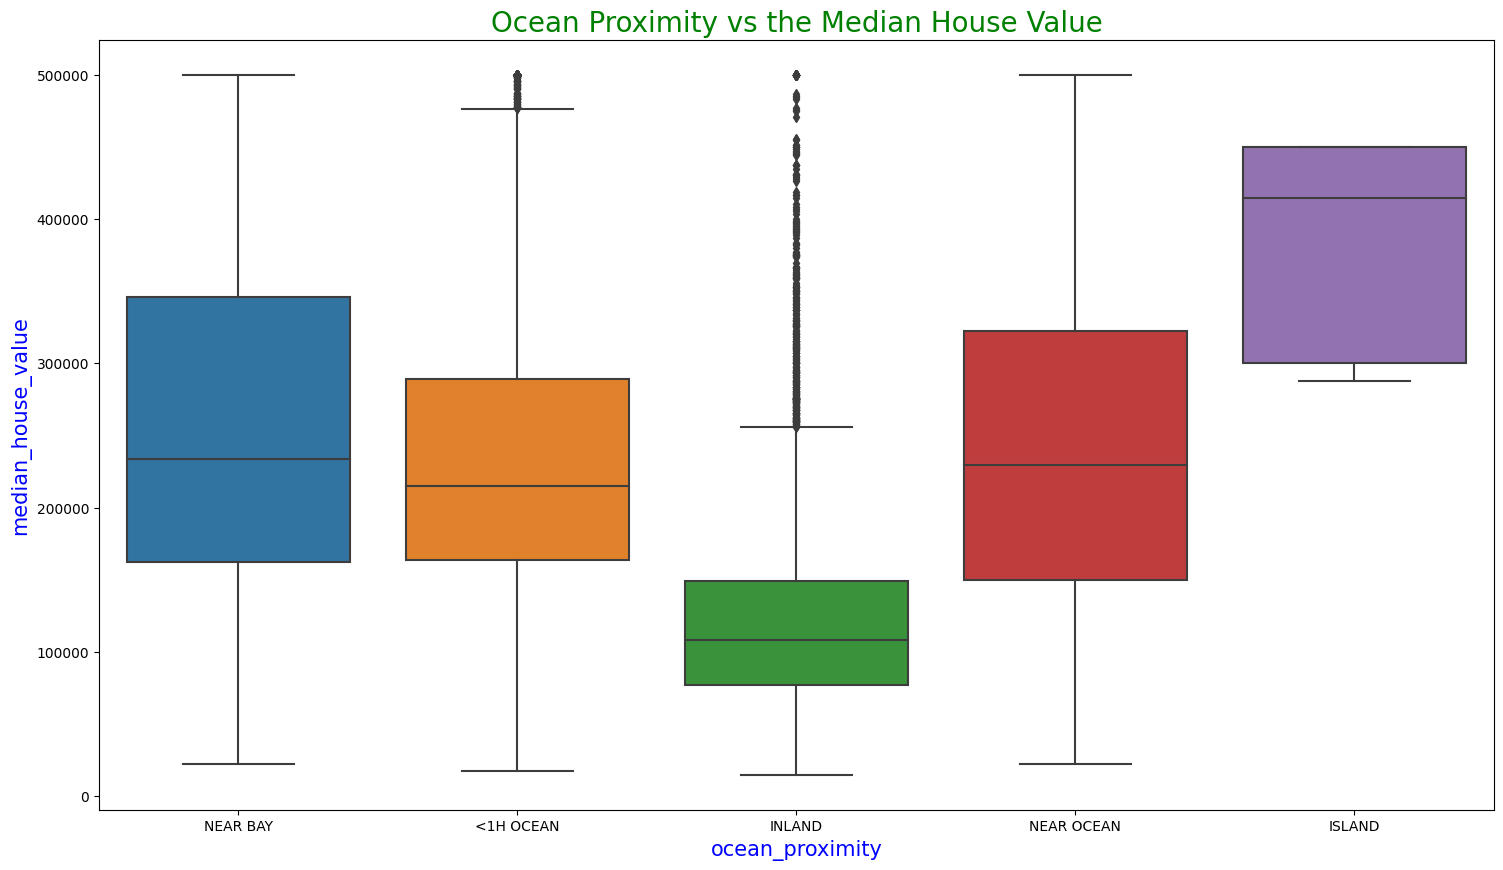

In [21]:
# box plot to show the outliers between the ocean_proximity and the median_house_value
plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x="ocean_proximity", y="median_house_value")
plt.title("Ocean Proximity vs the Median House Value", fontsize=20, color="green")
plt.xlabel("ocean_proximity",fontsize=15, color="blue")
plt.ylabel("median_house_value",fontsize=15, color="blue")
plt.show()

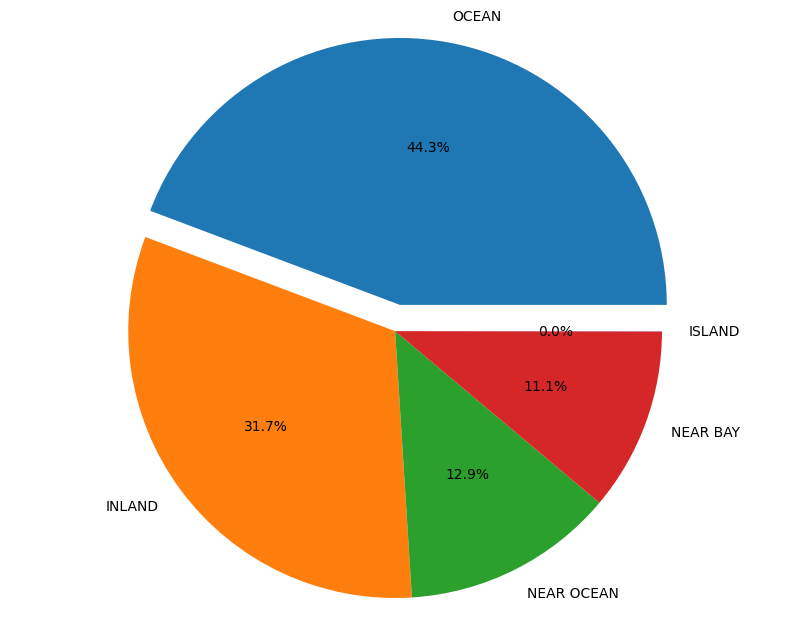

In [22]:
# pie plot to show the percintile for every category in ocean_proximity column
plt.figure(figsize=(10, 8))
plt.pie([9136,6551,2658,2290,5] , 
        labels=("OCEAN" , "INLAND" ,"NEAR OCEAN" , "NEAR BAY" , "ISLAND") ,
        autopct="%1.1f%%", explode=(0.1, 0, 0, 0, 0))
plt.axis("equal")
plt.show()

<Figure size 1000x1000 with 0 Axes>

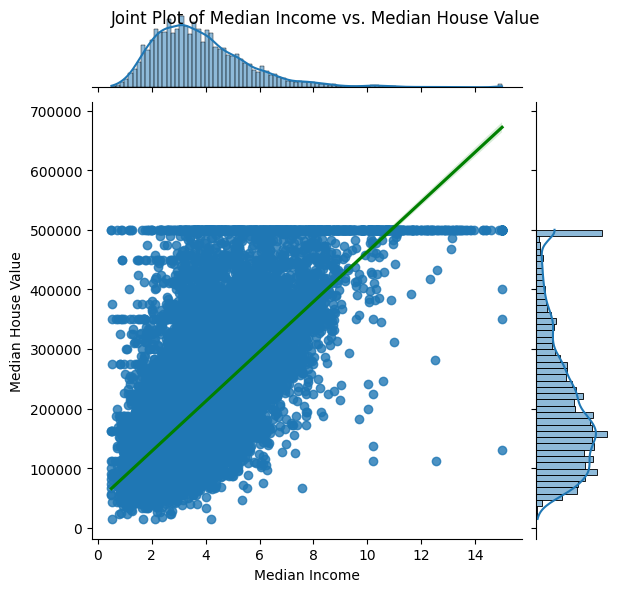

In [23]:
# Joint Plot (Regression Plot)
plt.figure(figsize=(10, 10))
sns.jointplot(x='median_income', y='median_house_value', data=df, kind='reg', line_kws={"color":"green"})
plt.suptitle('Joint Plot of Median Income vs. Median House Value')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

## Data Preprocessing

In [24]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

### `Feature Engineering`

In [25]:
# create new features
df['population_density'] = df['population'] / df['households']
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df["Another Rooms"] = df["total_rooms"] - df["total_bedrooms"]
df['proximity_to_location'] = df['longitude'] * df['latitude']

##### `Population Density:`
Calculating population density by dividing population by households can provide insights into the crowdedness of the area.
Higher density might impact housing demand or prices.

##### `Rooms per Household and Bedrooms per Room:`
These features offer insights into the average number of rooms per household and the ratio of bedrooms to total rooms.
They might indicate the size or configuration of houses in different areas.

##### `Another Rooms:`
This feature represents the difference between total rooms and total bedrooms,which could give a sense of the number of non-bedroom rooms in a property.
It might relate to additional spaces like living rooms, dens, or offices.

##### `Proximity to Location:`
Multiplying longitude and latitude creates a new feature representing the combined geographical position.
This could capture unique geographical patterns or identify specific regions within the dataset.

In [26]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  population_density  rooms_per_household  \
0            NEAR BAY            2.555556             6.984127   
1            NEAR BAY            2.109842             6.238137   
2            NEAR BAY            2.802260             8.288136   
3            NEAR BAY            2.547945             5.817352   
4            NEAR BAY            2.181467             6.281853   
...               ...                 ...                  ...   
20635          INLAND            2.560606             5.045455   
20636          INLAND            3.122807             6.114035   
20637          INLAND            2.325635             5.205543   
20638          INLAND            2.123209             5.329513   
20639          INLAND            2.616981             5.254717   

       bedrooms_per_room  Another Rooms  proximity_to_location  
0               0.146591          751.0             -4630.0724  
1               0.155797         5993.0             -4627.2492  
2               0.129516         1277.0             -4626.7840  
3               0.184458         1039.0             -4627.1625  
4               0.172096         1347.0             -4627.1625  
...                  ...            ...                    ...  
20635           0.224625         1291.0             -4780.6332  
20636           0.215208          547.0             -4786.5829  
20637           0.215173         1769.0             -4779.7046  
20638           0.219892         1451.0             -4783.6476  
20639           0.221185         2169.0             -4773.2188  

[20640 rows x 15 columns]

In [27]:
# splitting the data
X = df.drop(columns=["median_house_value"], axis=1)
y = df["median_house_value"]

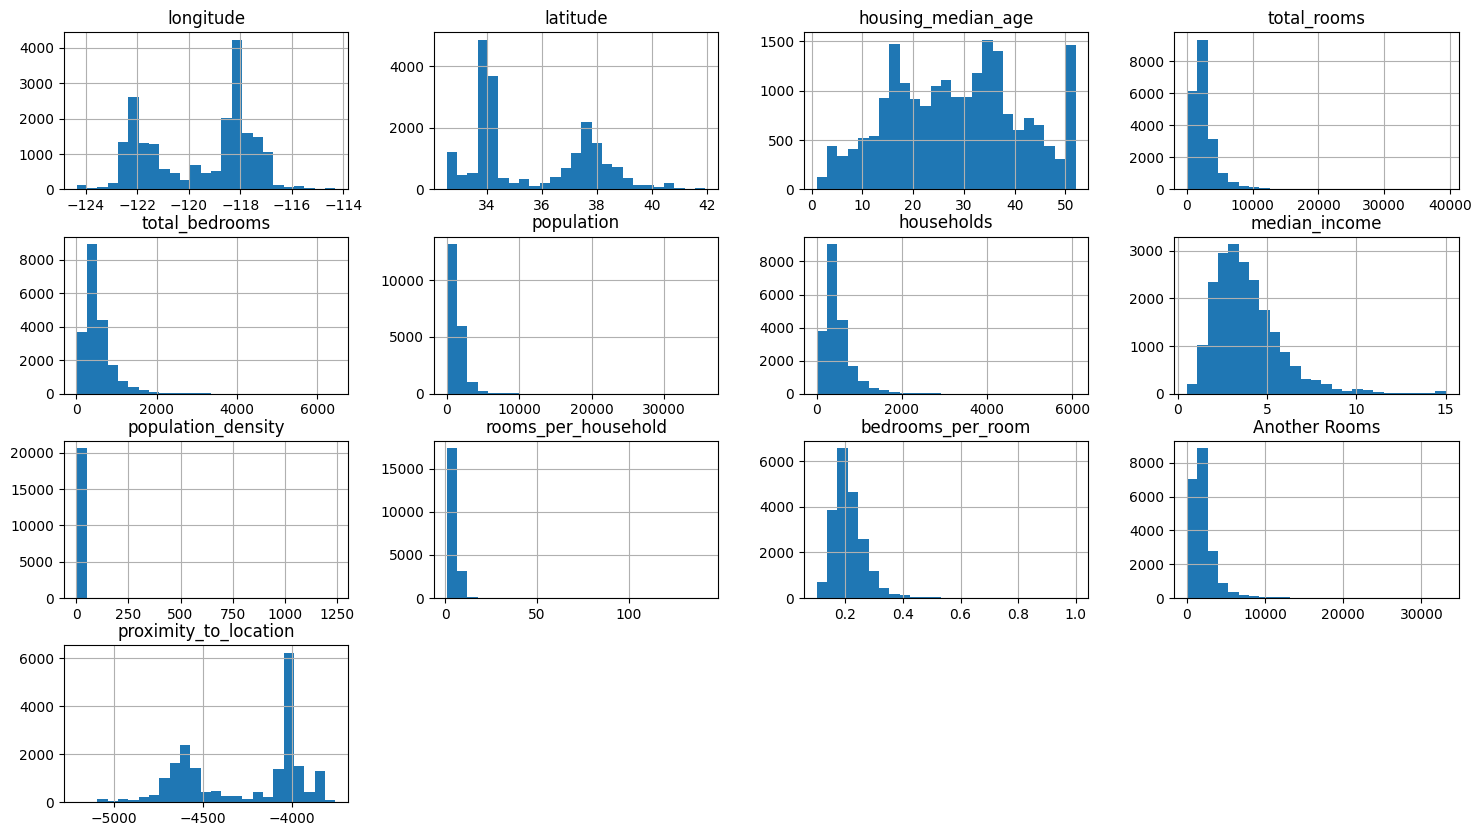

In [28]:
# histograme to show the skewd data
X.hist(figsize=(18, 10), bins=25);

In [29]:
# solve the skewd data
skewd_cols = ["total_rooms", "total_bedrooms", "population", "households", "median_income",
              "population_density", "rooms_per_household", "bedrooms_per_room", "Another Rooms"]

for col in skewd_cols:
    X[col] = np.log(X[col]+1e-10).astype(float)

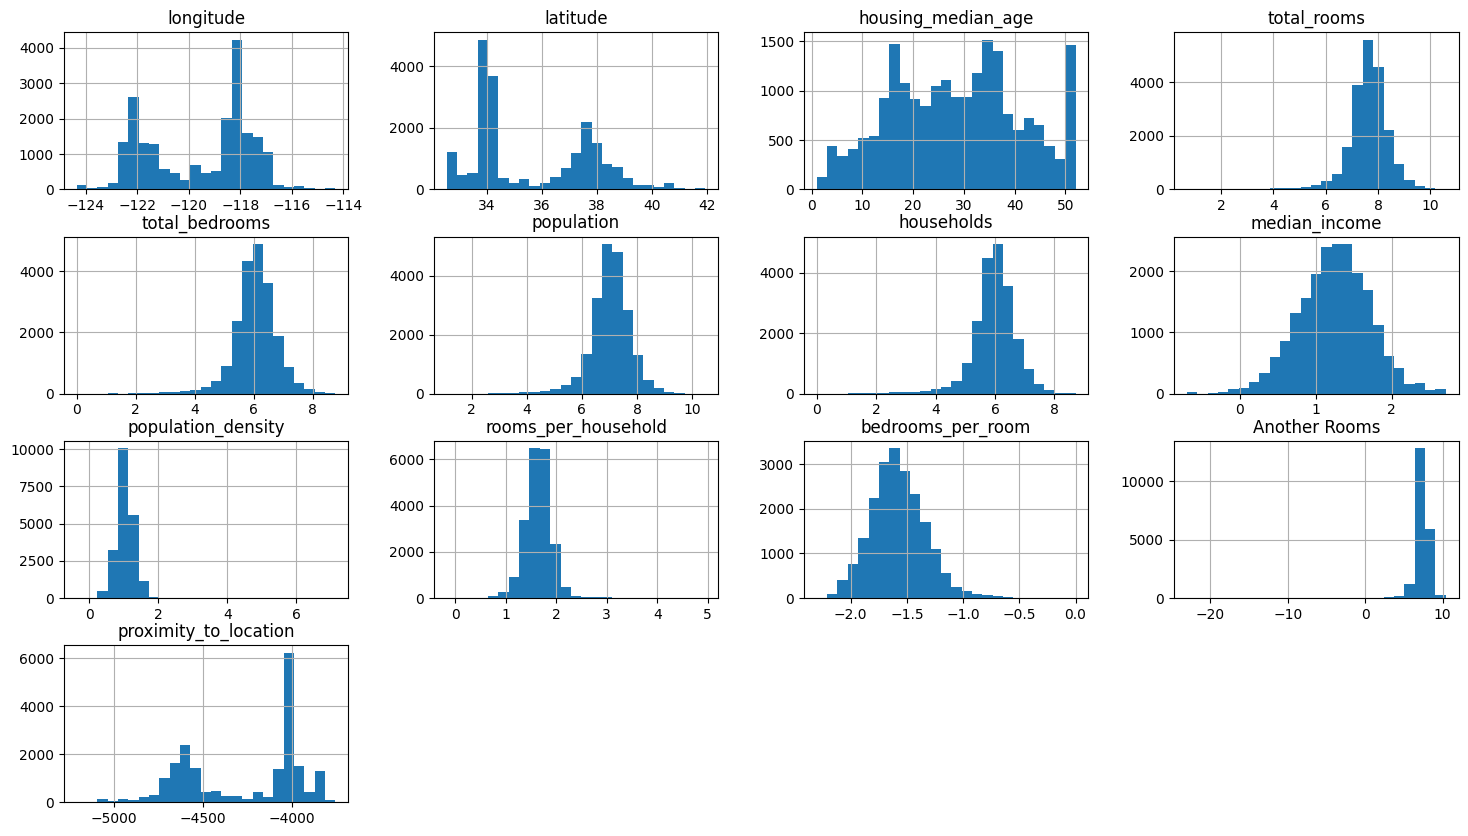

In [30]:
# histograme to show the skewd data
X.hist(figsize=(18, 10), bins=25);

In [31]:
# this func to check if there are numeric columns or categorical columns and return them
def check(X):
    
    # numeric columns
    numeric_columns = [col for col in X.columns if X[col].dtype != object]
    
    # categorical columns
    categorical_columns = [col for col in X.columns if X[col].dtype == object]
    
    if numeric_columns and categorical_columns:
        
        return numeric_columns, categorical_columns
    
    elif numeric_columns:
        
        return numeric_columns
    
        
    else:
        return categorical_columns
        
numeric_columns, categorical_columns = check(X)

In [32]:
# numeric columns
numeric_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'population_density',
 'rooms_per_household',
 'bedrooms_per_room',
 'Another Rooms',
 'proximity_to_location']

In [33]:
# categorical columns
categorical_columns

['ocean_proximity']

### `Pipeline`

In [34]:
# numerical pipeline to solve the nan and make Standardization
num_pipeline = Pipeline(steps=[
                            ("selector", DataFrameSelector(numeric_columns)), # ==> To select the numeric cols from the Data
                            ("Imputer", SimpleImputer(strategy="median") ),
                            ("Scaler", StandardScaler())
                                ])


# categorical pipeline 
cate_pipeline = Pipeline(steps=[
                 ("selector", DataFrameSelector(categorical_columns)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("Label", OneHotEncoder(sparse=False))
                ])

In [35]:

def Preprocessing(numeric_columns, categorical_columns):
    if numeric_columns and categorical_columns:
        # Total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cate_pipeline", cate_pipeline)
        ])
        # Make fitting
        X_final = total_pipeline.fit_transform(X)
        return X_final

    elif numeric_columns and not categorical_columns:
        # Make fitting
        X_final = num_pipeline.fit_transform(X)
        return X_final

    elif categorical_columns and not numeric_columns:
        # Make fitting for categorical pipeline only
        X_final = cate_pipeline.fit_transform(X[categorical_columns])
        return X_final

    else:
        return "Please provide either numeric_columns, categorical_columns, or both."

X_final = Preprocessing(numeric_columns, categorical_columns)
print(f"X_final is = {X_final}")

X_final is = [[-1.32783522  1.05254828  0.98214266 ...  0.          1.
   0.        ]
 [-1.32284391  1.04318455 -0.60701891 ...  0.          1.
   0.        ]
 [-1.33282653  1.03850269  1.85618152 ...  0.          1.
   0.        ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ...  0.          0.
   0.        ]
 [-0.87362627  1.77823747 -0.84539315 ...  0.          0.
   0.        ]
 [-0.83369581  1.75014627 -1.00430931 ...  0.          0.
   0.        ]]


## Splitting The Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.30, random_state=42, shuffle=True)

In [37]:
# show the shapes
print(f"the X_train shape is {X_train.shape}")
print(f"the y_train shape is {y_train.shape}")
print(f"the X_test shape is {X_test.shape}")
print(f"the y_test shape is {y_test.shape}")

the X_train shape is (14448, 18)
the y_train shape is (14448,)
the X_test shape is (6192, 18)
the y_test shape is (6192,)


## The Model & Hyperparameters Tunning

### `AdaBoostRegressor`

In [38]:
AdaBoost = AdaBoostRegressor()

params = {
    "n_estimators":[i for i in range(50, 200, 30)],
    "learning_rate":np.arange(0.1, 1, 0.2),
    "loss":['linear', 'square', 'exponential']
}

Grid_search = GridSearchCV(AdaBoost, param_grid=params, scoring="neg_mean_squared_error",
                           n_jobs=-1, cv=5, verbose=0)

# fitting
Grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 80, 110, 140, 170]},
             scoring='neg_mean_squared_error')

In [39]:
# show the best parameters
Grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}

In [40]:
# make the model 
AdaBoost_model = Grid_search.best_estimator_

In [41]:
# make croos validation
croos_val = cross_val_score(estimator=AdaBoost_model, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=AdaBoost_model, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [70406.83495592 69152.48285224 69480.71849709 69184.70322309
 71088.43767696]
the mean to the errors is ==> 69866.7985060588
****************************************************************************************************
the RMSE is 69870.18121653545


In [42]:
# show the feature importance 
importance = AdaBoost_model.feature_importances_
importance

array([1.78245918e-03, 2.50585663e-03, 6.51701182e-03, 0.00000000e+00,
       3.60850958e-04, 2.32345816e-03, 5.49664695e-03, 6.14983744e-01,
       1.22686284e-01, 0.00000000e+00, 1.05809410e-02, 1.73686658e-04,
       6.37061885e-03, 0.00000000e+00, 2.26218442e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [43]:
# prediction
y_pred_ِAda = AdaBoost_model.predict(X_train)

In [44]:
pd.DataFrame(np.c_[y_pred_ِAda, y_train], columns=["prediction", "Actual"])

prediction    Actual
0      231298.319431  193800.0
1      254222.230513  169700.0
2      251140.679643  259800.0
3      106465.702617  136100.0
4      255980.396415  500001.0
...              ...       ...
14443  358270.841398  229200.0
14444  104341.094156   97800.0
14445  180454.829013  222100.0
14446  263502.407746  283500.0
14447  255826.755476  325000.0

[14448 rows x 2 columns]

### `RandomForestRegressor`

In [45]:
Random_forest = RandomForestRegressor()

params = {
    "n_estimators":[i for i in range(50, 200, 30)],
    "max_depth":np.arange(2, 10, 2),
}

Grid_search = GridSearchCV(Random_forest, param_grid=params, scoring="neg_mean_squared_error",
                           n_jobs=-1, cv=5, verbose=0)

# fitting
Grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': [50, 80, 110, 140, 170]},
             scoring='neg_mean_squared_error')

In [46]:
# show the best parameters
Grid_search.best_params_

{'max_depth': 8, 'n_estimators': 170}

In [47]:
# make the model 
Randomforest_model = Grid_search.best_estimator_

In [48]:
# make croos validation
croos_val = cross_val_score(estimator=Randomforest_model, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Randomforest_model, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [56524.24320056 57020.19090445 54949.05217972 54873.36741708
 56269.73761253]
the mean to the errors is ==> 55933.99752976231
****************************************************************************************************
the RMSE is 55902.063914130595


In [49]:
# show the feature importance 
importance = Randomforest_model.feature_importances_
importance

array([2.37877901e-02, 2.19204216e-02, 3.35574928e-02, 2.35179396e-03,
       3.60376253e-03, 3.42365016e-03, 3.02386559e-03, 5.71823320e-01,
       1.19849677e-01, 8.10913015e-03, 8.43124249e-03, 2.80076541e-03,
       2.08071788e-02, 2.92498276e-04, 1.75159640e-01, 1.83213315e-04,
       8.44297824e-05, 7.90128094e-04])

In [50]:
# prediction
y_pred_ِRand = Randomforest_model.predict(X_train)

In [51]:
pd.DataFrame(np.c_[y_pred_ِRand, y_train], columns=["prediction", "Actual"])

prediction    Actual
0      206167.180897  193800.0
1      155269.263452  169700.0
2      245361.425918  259800.0
3      131366.206218  136100.0
4      328735.598046  500001.0
...              ...       ...
14443  278674.377521  229200.0
14444  110346.373584   97800.0
14445  185198.941295  222100.0
14446  257503.238891  283500.0
14447  323905.056438  325000.0

[14448 rows x 2 columns]

### `XGBoost`


In [52]:
Xgb_reg= xgb.XGBRegressor()

params = {
    "n_estimators" : np.arange(50, 200, 10),
    "max_depth" : np.arange(2, 10, 1),
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "subsample" : np.arange(0.2, 1, 0.25),
    "alpha" :  np.arange(0.1, 1, 0.1)
}

Grid_search = RandomizedSearchCV(estimator=Xgb_reg, param_distributions=params, n_jobs=-1,
                                  cv=5, scoring="neg_mean_squared_error", n_iter=500)


# fitting
Grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2 , 0.45, 0.7 , 0.95])},
                   scoring='neg_mean_squared_error')

In [53]:
# show the best params
Grid_search.best_params_

{'subsample': 0.95,
 'n_estimators': 190,
 'max_depth': 7,
 'learning_rate': 0.1,
 'alpha': 0.5}

In [54]:
# the final model
Xgb_reg_final = Grid_search.best_estimator_

In [55]:
# make croos validation
croos_val = cross_val_score(estimator=Xgb_reg_final, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Xgb_reg_final , X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [47046.0597704  47301.83764826 46296.2390313  46207.16710403
 46265.55583909]
the mean to the errors is ==> 46625.61802731275
****************************************************************************************************
the RMSE is 46625.67168488858


In [56]:
# show the feature importance 
importance = Xgb_reg_final.feature_importances_
importance

array([0.01361219, 0.01838657, 0.01680617, 0.00587471, 0.00783047,
       0.0064169 , 0.00693889, 0.17414264, 0.04390724, 0.00923309,
       0.00870267, 0.00655412, 0.02140235, 0.00759539, 0.59443337,
       0.02691369, 0.01196617, 0.01928353], dtype=float32)

In [57]:
# prediction
y_pred_ِxgb = Xgb_reg_final.predict(X_train)

In [58]:
pd.DataFrame(np.c_[y_pred_ِxgb, y_train], columns=["prediction", "Actual"])

prediction    Actual
0      202253.234375  193800.0
1      154614.671875  169700.0
2      274922.750000  259800.0
3      146954.718750  136100.0
4      419722.437500  500001.0
...              ...       ...
14443  245601.218750  229200.0
14444  105866.007812   97800.0
14445  222992.390625  222100.0
14446  278479.843750  283500.0
14447  335894.781250  325000.0

[14448 rows x 2 columns]

In [59]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
17505    237500.0
13512     67300.0
10842    218400.0
16559    119400.0
5786     209800.0
Name: median_house_value, Length: 6192, dtype: float64

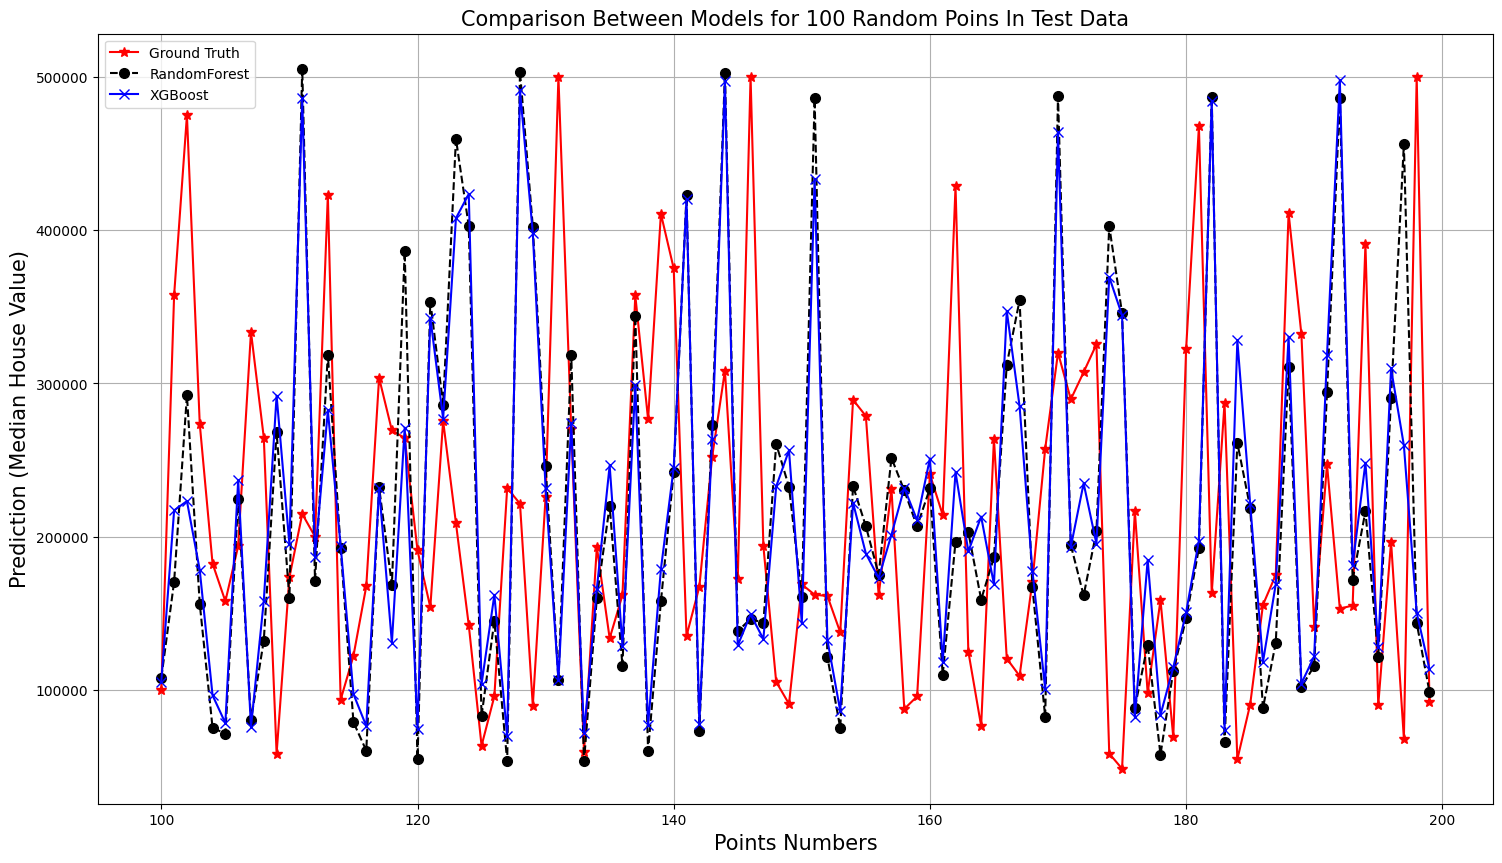

In [60]:
# X_axis numbers
x_x = np.arange(100, 200)

#plotting
plt.figure(figsize=(18, 10))
plt.plot(x_x, y_test.values[100:200], 'r*-', markersize=7, label="Ground Truth")
plt.plot(x_x, y_pred_ِxgb[100:200], 'ko--', markersize=7, label="RandomForest")
plt.plot(x_x, y_pred_ِRand[100:200], 'bx-', markersize=7, label="XGBoost")
plt.title("Comparison Between Models for 100 Random Poins In Test Data", fontsize=15, color="k")
plt.xlabel("Points Numbers", fontsize=15, color="k")
plt.ylabel("Prediction (Median House Value)", fontsize=15, color="k")
plt.legend()
plt.grid(True)
plt.show()

### `Deep Learning model`

In [61]:
# Creating the neural network model with dropout and early stopping
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(1)) 

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Adding early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])


Epoch 1/20
452/452 [==============================] - 8s 4ms/step - loss: 40486887424.0000 - mse: 40486887424.0000 - val_loss: 9961085952.0000 - val_mse: 9961085952.0000
Epoch 2/20
452/452 [==============================] - 2s 4ms/step - loss: 7493781504.0000 - mse: 7493781504.0000 - val_loss: 5243411968.0000 - val_mse: 5243411968.0000
Epoch 3/20
452/452 [==============================] - 2s 4ms/step - loss: 5619796992.0000 - mse: 5619796992.0000 - val_loss: 4566166016.0000 - val_mse: 4566166016.0000
Epoch 4/20
452/452 [==============================] - 2s 4ms/step - loss: 5218510336.0000 - mse: 5218510336.0000 - val_loss: 4312367104.0000 - val_mse: 4312367104.0000
Epoch 5/20
452/452 [==============================] - 2s 4ms/step - loss: 5079681536.0000 - mse: 5079681536.0000 - val_loss: 4164470016.0000 - val_mse: 4164470016.0000
Epoch 6/20
452/452 [==============================] - 2s 4ms/step - loss: 4982030336.0000 - mse: 4982030336.0000 - val_loss: 4085110528.0000 - val_mse: 408511

In [62]:
# Evaluating the model
loss, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f"RMSE on Test Data: {np.sqrt(rmse)}")
print(f"loss on Test Data: {loss}")

RMSE on Test Data: 60125.69234528614
loss on Test Data: 3615098880.0


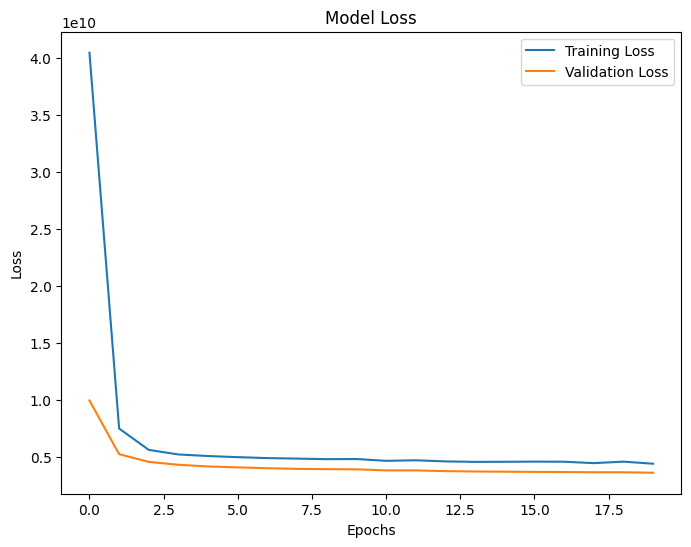

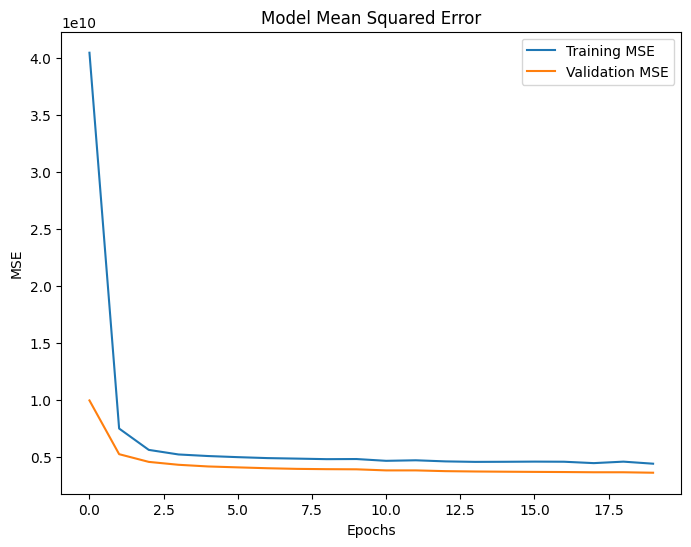

In [63]:
# Visualization: Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualization: Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### `we founded that XGBoost is the best so we will use it to predict on X_test`

In [64]:
# prediction
y_pred_XGB = Xgb_reg_final.predict(X_test)

In [65]:
# RMSE
print("The RMSE:")
np.sqrt(mean_squared_error(y_test, y_pred_XGB))

The RMSE:


44885.22298725691

In [66]:
pd.DataFrame(np.c_[y_pred_XGB, y_test], columns=["prediction", "Actual"])

prediction    Actual
0      58708.261719   47700.0
1      72176.343750   45800.0
2     568345.125000  500001.0
3     234678.062500  218600.0
4     251493.593750  278000.0
...             ...       ...
6187  223751.171875  237500.0
6188   63243.457031   67300.0
6189  254457.015625  218400.0
6190  141510.343750  119400.0
6191  207143.281250  209800.0

[6192 rows x 2 columns]

## `By:Mohammed Hamza`